In [1]:
import pandas as pd 
import numpy as np 
import pylab as plt 

In [2]:
df = pd.read_csv("out.csv",index_col=0)


In [3]:
likerts = df[[col for col in df.columns if "likert" in col]]
likerts.head()

,likert_E_lq-0,likert_E_lq-1,likert_E_lq-9,likert_E_lq-2,likert_E_lq-3,likert_E_lq-4,likert_E_lq-5,likert_E_lq-6,likert_E_lq-7,likert_E_lq-8,...,likert_S_lq-0,likert_S_lq-1,likert_S_lq-9,likert_S_lq-2,likert_S_lq-3,likert_S_lq-4,likert_S_lq-5,likert_S_lq-6,likert_S_lq-7,likert_S_lq-8
p_325,5,5,5,5,5,5,5,5,3,5,...,4,4,4,5,4,4,5,5,3,4
p_328,4,4,4,4,4,5,3,5,3,4,...,3,4,3,4,5,4,3,5,3,3
p_329,4,4,4,2,2,4,2,5,3,3,...,2,2,2,2,2,4,2,4,3,1
p_330,4,3,4,4,4,4,3,5,3,4,...,4,4,4,4,5,3,3,5,3,4
p_335,4,4,4,5,5,5,3,5,3,4,...,3,3,4,5,5,5,3,5,3,4


In [4]:
likert_dict = {qnum: likerts[[col for col in likerts.columns if str(qnum) in col]] for qnum in range(10)}


In [5]:
def to_factor(dat, name):
    vals = list()
    for index, row in dat.iterrows():
        for col in dat.columns:
            vals.append([row[col], index, col])
    pd.DataFrame(vals, columns=["values", "participants", "groups"]).to_csv(f"hypotheses/{name}.csv",index=False)

In [6]:
for qnum, dat in likert_dict.items():
    dat = dat.rename(columns = dict(zip(dat.columns, ["E", "H", "S"])))
    dat.to_csv(f"hypotheses/likert-q{qnum}.csv",index=False)
    to_factor(dat,f"likert-q{qnum}-factor")
    plt.boxplot(dat.to_numpy(), labels=["E", "H", "S"])
    plt.suptitle(f"Likert q_{qnum} responses")
    plt.savefig(f"figures/likert-{qnum}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

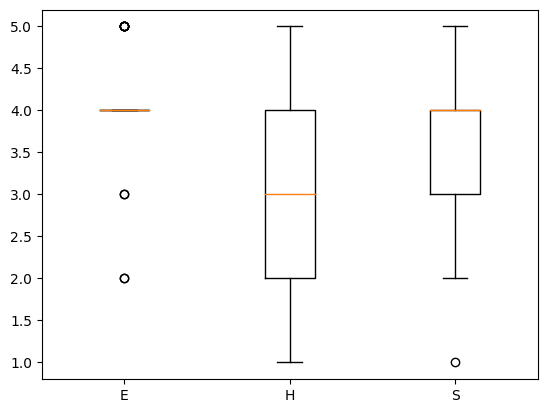

In [7]:
plt.boxplot(likert_dict[0].to_numpy(), labels=["E", "H", "S"])
# plt.suptitle(f"H1a with {analysisType}")
# plt.savefig(f"H1a_{analysisType}.png")
plt.show()

In [25]:
testDict = dict(zip(range(10), 
               [
                   "This style of visualization was easy to read and understand.", 
                    "The visualization style supported answering the questions asked.", 
                    "The provided interactions overall supported answering the questions asked.", 
                    "The click-and-drag interaction assisted answering questions.",
                    "The scroll interaction assisted answering questions.", 
                    "The double click interaction assisted answering questions.",
                    "The hover interaction assisted answering questions.",
                    "The reset button interaction assisted answering questions.",
                    "It was enjoyable utilizing the interactions.",
                    "The visualizations were aesthetically pleasing."
                    ]
            ))

In [26]:
import scipy.stats as st

In [27]:
likert_dict[0].head()
H2 = likert_dict[0].rename(mapper=dict(zip(likert_dict[0].columns, ['E', "H", "S"])),axis=1)

['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']


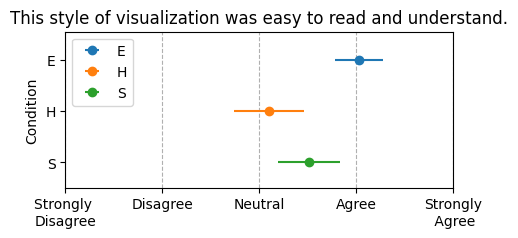

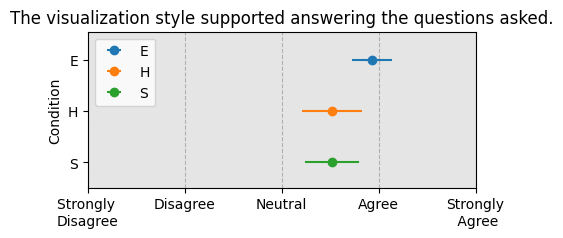

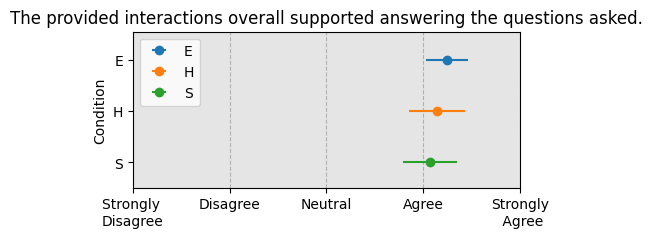

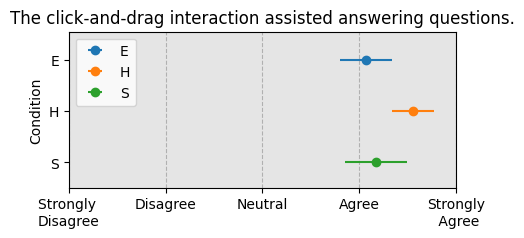

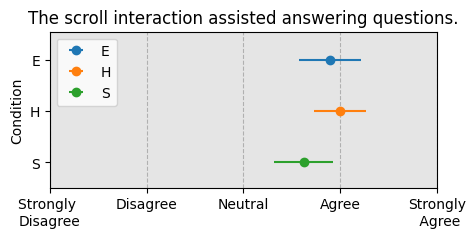

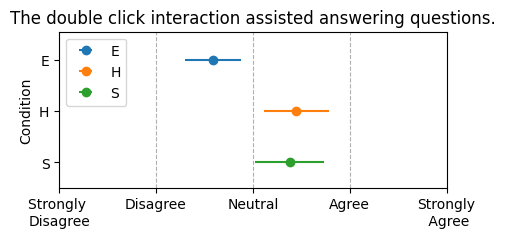

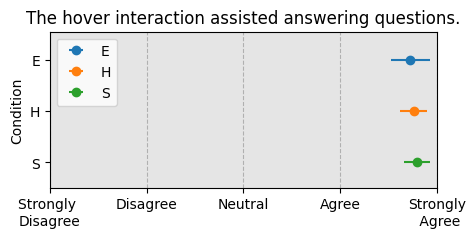

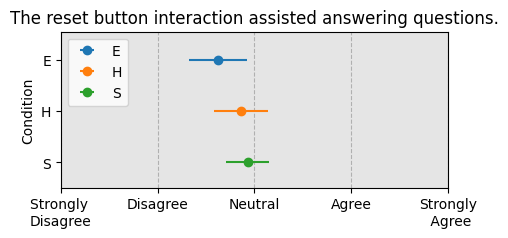

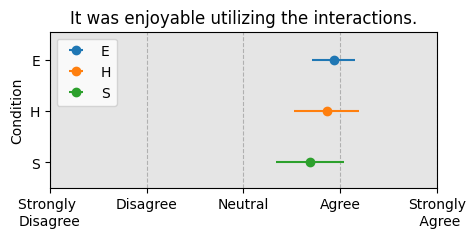

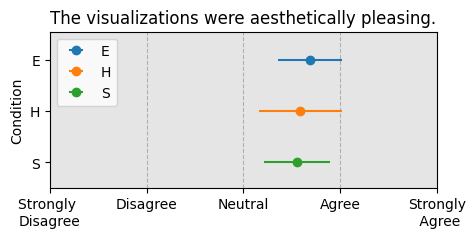

In [29]:
for qnum, dat in likert_dict.items():
    H2 =  dat.rename(mapper=dict(zip(dat.columns, ['E', "H", "S"])),axis=1)

    labels = list("SHE")
    means = [H2[g].mean() for g in labels]
    CI = [st.t.interval(confidence=0.9, df=len(H2[g])-1, loc=H2[g].mean(), scale=st.sem(H2[g])) for g in labels ]


    colors = ["tab:blue", "tab:orange", "tab:green"][::-1]
    fig, ax = plt.subplots()
    error_plots = list()
    for i,(mean, (low, high)) in enumerate(zip(means, CI)):
        
        err = ax.errorbar(mean, [i/10], xerr=[abs(low - mean)], fmt='o',color=colors[i%3])
        error_plots.append(err)

    xmin = 1.
    xmax = 5
    ax.set_xlim(xmin, xmax)
    ax.legend(error_plots[::-1],["E", "H", "S"],loc="upper left")

    print(labels)
    ax.set_yticks([i / 10 for i in range(3)], labels=labels)
    ax.set_ylim(-0.05, 2/10 + 0.055)
    # ax.hlines([0-0.05, 0.25, (5/10 + 0.05)], xmin, xmax, colors="black")
    ax.set_xticks([1,2,3,4,5], labels=["Strongly \nDisagree", "Disagree", "Neutral", "Agree", "Strongly\n Agree"])
    ax.grid(True,axis='x',linestyle='--')

    # ax.set_xlabel("Accuracy")
    ax.set_ylabel("Condition")
    ax.set_title(testDict[qnum])
    fig.set_size_inches(5,2.3)
    if qnum != 0 and qnum != 5:
        ax.axhspan(-0.05,0.35,facecolor="grey",alpha=0.2)


    # ax2 = ax.twinx()
    # ax2.set_ylim(-0.05, 8/10 + 0.055)
    # ax2.set_yticks([i / 10 for i in range(1,9,3)], ["H1c", "H1b", "H1a"])

    fig.subplots_adjust(bottom=0.2)
    fig.savefig(f"figures/likert-q{qnum}.pdf")